In [99]:
# import dependecies 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import requests
import json
import csv
import os
import random

In [2]:
# creates path for csv datafile
file1= "phs_2019_stage_1.csv"
file2= "phs_2019_stage_2.csv"
file3= "phs_2019_stage_3.csv"
file4= "phs_2019_stage_4.csv"  
file5= "phs_2019_playoffs.csv"

# create paths for api data
url1 = "https://api.overwatchleague.com/players"
url2 = "https://api.overwatchleague.com/stats/players"


In [3]:
# reads the csv and transforms it into a dataframe
overwatch_df_1 = pd.read_csv(file1)
overwatch_df_2 = pd.read_csv(file2)
overwatch_df_3 = pd.read_csv(file3)
overwatch_df_4 = pd.read_csv(file4)
overwatch_df_5 = pd.read_csv(file5)

In [4]:
# read api data 
response1 = requests.get(url1)
response = requests.get(url2)

In [5]:
# combining all csv data into one dataframe 
complete_overwatch_df = overwatch_df_1.append([overwatch_df_2, overwatch_df_3, overwatch_df_4, overwatch_df_5])

In [6]:
complete_overwatch_df

,pelstart_time,match_id,stage,map_type,map_name,player,team,stat_name,hero,stat_amount,start_time
0,2/15/2019 0:11,21211,Overwatch League Stage 1,CONTROL,Ilios,Bdosin,London Spitfire,All Damage Done,All Heroes,14845.193400,NaN
1,2/15/2019 0:11,21211,Overwatch League Stage 1,CONTROL,Ilios,Bdosin,London Spitfire,Assists,All Heroes,13.000000,NaN
2,2/15/2019 0:11,21211,Overwatch League Stage 1,CONTROL,Ilios,Bdosin,London Spitfire,Average Time Alive,All Heroes,87.623574,NaN
3,2/15/2019 0:11,21211,Overwatch League Stage 1,CONTROL,Ilios,Bdosin,London Spitfire,Barrier Damage Done,All Heroes,5674.344475,NaN
4,2/15/2019 0:11,21211,Overwatch League Stage 1,CONTROL,Ilios,Bdosin,London Spitfire,Damage - Quick Melee,All Heroes,78.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...
103967,NaN,30157,Overwatch League 2019 Post-Season,PAYLOAD,Watchpoint: Gibraltar,Twilight,Vancouver Titans,Ultimates Used,Ana,6.000000,9/29/2019 20:47
103968,NaN,30157,Overwatch League 2019 Post-Season,PAYLOAD,Watchpoint: Gibraltar,Twilight,Vancouver Titans,Unscoped Accuracy,Ana,0.528777,9/29/2019 20:47
103969,NaN,30157,Overwatch League 2019 Post-Season,PAYLOAD,Watchpoint: Gibraltar,Twilight,Vancouver Titans,Unscoped Hits,Ana,147.000000,9/29/2019 20:47
103970,NaN,30157,Overwatch League 2019 Post-Season,PAYLOAD,Watchpoint: Gibraltar,Twilight,Vancouver Titans,Unscoped Shots,Ana,278.000000,9/29/2019 20:47


In [7]:
# drops the columns below
dropped_complete_overwatch_df = complete_overwatch_df.drop(columns=["pelstart_time", "map_name",  "map_type", "start_time"])

In [8]:
# Creates a list of the rows we would liek to keep
stats = ["All Damage Done", "Assists", "Average Time Alive", "Critical Hit Accuracy", "Damage - Weapon Primary",  "Damage - Weapon Secondary", "Damage Blocked", "Damage Done", "Damage Taken", "Deaths", "Eliminations", "Healing Done", "Multikills", "Primary Fire Accuracy", "Primary Fire Hits", "Secondary Fire Accuracy", "Secondary Fire Hits", "Time Alive", "Weapon Accuracy"]

In [9]:
# Drops the row names that aren't included in the the list
stats_df = dropped_complete_overwatch_df[dropped_complete_overwatch_df['stat_name'].isin(stats)]

In [10]:
# Displays new dataframe
stats_df

,match_id,stage,player,team,stat_name,hero,stat_amount
0,21211,Overwatch League Stage 1,Bdosin,London Spitfire,All Damage Done,All Heroes,14845.193400
1,21211,Overwatch League Stage 1,Bdosin,London Spitfire,Assists,All Heroes,13.000000
2,21211,Overwatch League Stage 1,Bdosin,London Spitfire,Average Time Alive,All Heroes,87.623574
5,21211,Overwatch League Stage 1,Bdosin,London Spitfire,Damage Done,All Heroes,9039.330256
6,21211,Overwatch League Stage 1,Bdosin,London Spitfire,Damage Taken,All Heroes,4192.611340
...,...,...,...,...,...,...,...
103931,30157,Overwatch League 2019 Post-Season,Twilight,Vancouver Titans,Eliminations,Ana,19.000000
103939,30157,Overwatch League 2019 Post-Season,Twilight,Vancouver Titans,Healing Done,Ana,10009.825090
103942,30157,Overwatch League 2019 Post-Season,Twilight,Vancouver Titans,Multikills,Ana,2.000000
103961,30157,Overwatch League 2019 Post-Season,Twilight,Vancouver Titans,Time Alive,Ana,765.860023


In [11]:
stats_df["stat_name"].unique()

array(['All Damage Done', 'Assists', 'Average Time Alive', 'Damage Done',
       'Damage Taken', 'Deaths', 'Eliminations', 'Healing Done',
       'Multikills', 'Time Alive', 'Weapon Accuracy',
       'Critical Hit Accuracy', 'Damage - Weapon Primary',
       'Secondary Fire Accuracy', 'Damage Blocked',
       'Damage - Weapon Secondary', 'Primary Fire Accuracy',
       'Primary Fire Hits', 'Secondary Fire Hits'], dtype=object)

In [12]:
# Rounds the stat_amount to four decimal places
rounded_stats_df = stats_df.round({"stat_amount" : 4})

In [13]:
# displays new dataframe 
rounded_stats_df

,match_id,stage,player,team,stat_name,hero,stat_amount
0,21211,Overwatch League Stage 1,Bdosin,London Spitfire,All Damage Done,All Heroes,14845.1934
1,21211,Overwatch League Stage 1,Bdosin,London Spitfire,Assists,All Heroes,13.0000
2,21211,Overwatch League Stage 1,Bdosin,London Spitfire,Average Time Alive,All Heroes,87.6236
5,21211,Overwatch League Stage 1,Bdosin,London Spitfire,Damage Done,All Heroes,9039.3303
6,21211,Overwatch League Stage 1,Bdosin,London Spitfire,Damage Taken,All Heroes,4192.6113
...,...,...,...,...,...,...,...
103931,30157,Overwatch League 2019 Post-Season,Twilight,Vancouver Titans,Eliminations,Ana,19.0000
103939,30157,Overwatch League 2019 Post-Season,Twilight,Vancouver Titans,Healing Done,Ana,10009.8251
103942,30157,Overwatch League 2019 Post-Season,Twilight,Vancouver Titans,Multikills,Ana,2.0000
103961,30157,Overwatch League 2019 Post-Season,Twilight,Vancouver Titans,Time Alive,Ana,765.8600


In [14]:
player_count_df = rounded_stats_df["stage"].nunique()
player_count_df 

8

In [15]:
Hero_name = (['Zenyatta', 'McCree', 'Zarya', 'D.Va',
       'Wrecking Ball', 'Orisa', 'Reinhardt', 'Winston', 'Lúcio',
       'Brigitte', 'Hanzo', 'Ana', 'Widowmaker', 'Doomfist', 'Tracer',
       'Soldier: 76', 'Sombra', 'Ashe', 'Mercy', 'Genji', 'Pharah',
       'Moira', 'Torbjörn', 'Reaper', 'Mei', 'Bastion', 'Symmetra',
       'Roadhog', 'Junkrat', 'Baptiste', 'Sigma'])
Role =  (['Support', 'Damage', 'Tank', 'Tank',
       'Tank', 'Tank', 'Tank', 'Tank', 'Support',
       'Support', 'Damage', 'Support', 'Damage', 'Damage', 'Damage',
       'Damage', 'Damage', 'Damage', 'Support', 'Damage', 'Damage',
       'Support', 'Damage', 'Damage', 'Damage', 'Damage', 'Damage',
       'Tank', 'Damage', "Support", 'Tank'])

hero_role = pd.DataFrame({
    "hero" : Hero_name,
    "role" : Role
})
hero_role

,hero,role
0,Zenyatta,Support
1,McCree,Damage
2,Zarya,Tank
3,D.Va,Tank
4,Wrecking Ball,Tank
5,Orisa,Tank
6,Reinhardt,Tank
7,Winston,Tank
8,Lúcio,Support
9,Brigitte,Support


In [16]:

# Merge the hero class with the main dataframe
hero_class_df = (rounded_stats_df.merge(hero_role,on="hero",how="left"))

# Drop Nan values (All Heroes) from "hero" columns 
hero_class_df = hero_class_df[hero_class_df['role'].notna()]
print(hero_class_df.head(30))

    match_id                     stage    player             team  \
11     21211  Overwatch League Stage 1    Bdosin  London Spitfire   
12     21211  Overwatch League Stage 1    Bdosin  London Spitfire   
13     21211  Overwatch League Stage 1    Bdosin  London Spitfire   
14     21211  Overwatch League Stage 1    Bdosin  London Spitfire   
15     21211  Overwatch League Stage 1    Bdosin  London Spitfire   
16     21211  Overwatch League Stage 1    Bdosin  London Spitfire   
17     21211  Overwatch League Stage 1    Bdosin  London Spitfire   
18     21211  Overwatch League Stage 1    Bdosin  London Spitfire   
19     21211  Overwatch League Stage 1    Bdosin  London Spitfire   
20     21211  Overwatch League Stage 1    Bdosin  London Spitfire   
21     21211  Overwatch League Stage 1    Bdosin  London Spitfire   
22     21211  Overwatch League Stage 1    Bdosin  London Spitfire   
23     21211  Overwatch League Stage 1    Bdosin  London Spitfire   
35     21211  Overwatch League Sta

In [17]:
hero_picks = hero_class_df.drop_duplicates(subset=['match_id', 'hero'], keep='first')

In [18]:
hero_picks

,match_id,stage,player,team,stat_name,hero,stat_amount,role
11,21211,Overwatch League Stage 1,Bdosin,London Spitfire,All Damage Done,Zenyatta,14845.1934,Support
35,21211,Overwatch League Stage 1,Birdring,London Spitfire,All Damage Done,McCree,1439.9678,Damage
46,21211,Overwatch League Stage 1,Birdring,London Spitfire,All Damage Done,Zarya,18040.3536,Tank
72,21211,Overwatch League Stage 1,Fury,London Spitfire,All Damage Done,D.Va,13316.4290,Tank
84,21211,Overwatch League Stage 1,Fury,London Spitfire,Average Time Alive,Wrecking Ball,6.0960,Tank
...,...,...,...,...,...,...,...,...
464475,30157,Overwatch League 2019 Post-Season,Viol2t,San Francisco Shock,All Damage Done,Ana,3856.8818,Support
464485,30157,Overwatch League 2019 Post-Season,Viol2t,San Francisco Shock,All Damage Done,Baptiste,4603.0941,Support
464534,30157,Overwatch League 2019 Post-Season,moth,San Francisco Shock,Average Time Alive,Mercy,73.8903,Support
464587,30157,Overwatch League 2019 Post-Season,Haksal,Vancouver Titans,Average Time Alive,Genji,2.5960,Damage


In [19]:
df = hero_class_df["match_id"].unique()
len(df)

319

In [20]:
hero_df = pd.DataFrame(hero_picks['hero'].value_counts())
hero_df = hero_df.rename(columns={"hero" : "Games Used"})

In [21]:
hero_df = hero_df.reset_index()

In [22]:
hero_df["Pick Rate"] = hero_df["Games Used"]/len(df)*100
hero_df

,index,Games Used,Pick Rate
0,Wrecking Ball,319,100.000000
1,Lúcio,319,100.000000
2,D.Va,312,97.805643
3,Ana,307,96.238245
4,Tracer,304,95.297806
5,Zenyatta,302,94.670846
6,Sombra,297,93.103448
7,Widowmaker,295,92.476489
8,Winston,289,90.595611
9,Reinhardt,288,90.282132


In [23]:
hero_df = hero_df.rename(columns={"index" : "hero"})
hero_df

,hero,Games Used,Pick Rate
0,Wrecking Ball,319,100.000000
1,Lúcio,319,100.000000
2,D.Va,312,97.805643
3,Ana,307,96.238245
4,Tracer,304,95.297806
5,Zenyatta,302,94.670846
6,Sombra,297,93.103448
7,Widowmaker,295,92.476489
8,Winston,289,90.595611
9,Reinhardt,288,90.282132


In [24]:
hero_pickrate = hero_role.merge(hero_df, how="outer", on="hero")
hero_pickrate

,hero,role,Games Used,Pick Rate
0,Zenyatta,Support,302,94.670846
1,McCree,Damage,168,52.664577
2,Zarya,Tank,252,78.996865
3,D.Va,Tank,312,97.805643
4,Wrecking Ball,Tank,319,100.000000
5,Orisa,Tank,257,80.564263
6,Reinhardt,Tank,288,90.282132
7,Winston,Tank,289,90.595611
8,Lúcio,Support,319,100.000000
9,Brigitte,Support,268,84.012539


In [25]:
hero_pickrate = hero_pickrate.sort_values(by=['role', 'Pick Rate'], ascending=False)
hero_pickrate

,hero,role,Games Used,Pick Rate
4,Wrecking Ball,Tank,319,100.000000
3,D.Va,Tank,312,97.805643
7,Winston,Tank,289,90.595611
6,Reinhardt,Tank,288,90.282132
5,Orisa,Tank,257,80.564263
2,Zarya,Tank,252,78.996865
27,Roadhog,Tank,227,71.159875
30,Sigma,Tank,18,5.642633
8,Lúcio,Support,319,100.000000
11,Ana,Support,307,96.238245


In [26]:
#transform player data api data into dataframe
data1 = response.json()
data1.keys()

dict_keys(['data'])

In [27]:
df1 = pd.DataFrame(data1["data"])
df1.head(100)

,playerId,teamId,role,name,team,eliminations_avg_per_10m,deaths_avg_per_10m,hero_damage_avg_per_10m,healing_avg_per_10m,ultimates_earned_avg_per_10m,final_blows_avg_per_10m,time_played_total
0,5863,7697,support,AimGod,WAS,13.414336,4.687159,6721.795662,9486.871283,4.724139,3.651732,64900.715138
1,8812,7692,tank,ameng,CDH,16.470544,6.202665,7051.640852,0.724798,4.511644,5.046006,88703.810417
2,4841,4403,support,Anamo,NYE,14.165021,2.745207,3948.127250,6563.244540,3.567532,1.898150,97041.863429
3,5715,7693,offense,Architect,HZS,18.181756,4.555888,7825.862117,3806.894747,4.639483,8.087747,28710.098079
4,4652,7697,support,ArK,WAS,7.870130,2.641469,2482.555936,6825.268613,3.518943,1.320735,66326.727702
...,...,...,...,...,...,...,...,...,...,...,...,...
90,4104,4409,support,tobi,SEO,12.527639,3.561285,3821.983777,6536.903535,3.460255,2.083730,47510.945922
91,8729,4404,support,Twilight,SFS,16.044986,4.139107,7122.262343,9320.446421,5.048997,4.156948,100891.334471
92,8688,4404,support,Viol2t,SFS,17.185764,4.195764,7637.591409,10409.200261,5.300486,4.440653,110254.045210
93,5809,4408,tank,Void,SHD,19.343389,3.178936,6457.220391,250.965632,2.048810,5.555847,82291.682828


In [28]:
#tranform player stats api into data frame 
data = response1.json()
data.keys()

dict_keys(['content', 'totalElements', 'last', 'totalPages', 'numberOfElements', 'sort', 'first', 'size', 'number'])

In [29]:
df = pd.DataFrame(data["content"])
df.head(100)

,id,availableLanguages,name,homeLocation,accounts,game,attributes,attributesVersion,familyName,givenName,nationality,headshot,teams,user,@etag,type,handle
0,9279,[en],ILLICIT,Suncheon,"[{'id': 13648, 'competitorId': 9279, 'value': ...",OVERWATCH,"{'heroes': ['genji'], 'player_number': 21, 'pr...",1.0.2,Park,Je Min,KR,https://images.blz-contentstack.com/v3/assets/...,"[{'team': {'id': 4409, 'availableLanguages': [...",{'id': 920},c856ddbc,PLAYER,NaN
1,10011,[en],FunnyAstro,"Reading, England","[{'id': 14191, 'competitorId': 10011, 'value':...",OVERWATCH,"{'heroes': ['lucio', 'mercy'], 'player_number'...",1.0.2,Hathaway,Daniel,GB,https://images.blz-contentstack.com/v3/assets/...,"[{'team': {'id': 4524, 'availableLanguages': [...",{'id': 989},8f7f9011,PLAYER,NaN
2,8748,"[en, zh-cn]",JJANU,Seoul,"[{'id': 12876, 'competitorId': 8748, 'value': ...",OVERWATCH,"{'player_number': 14, 'preferred_slot': '3', '...",1.0.2,Choi,HyunWoo,KR,https://images.blz-contentstack.com/v3/assets/...,"[{'team': {'id': 7697, 'availableLanguages': [...",{'id': 1844},78b69123,PLAYER,NaN
3,9591,[en],frd,"Saint Louis, MO","[{'id': 13922, 'competitorId': 9591, 'value': ...",OVERWATCH,"{'heroes': ['dva', 'roadhog', 'zarya'], 'playe...",1.0.2,Goebel,Nathan,US,https://images.blz-contentstack.com/v3/assets/...,"[{'team': {'id': 7698, 'availableLanguages': [...",{'id': 1717},14194eb9,PLAYER,NaN
4,5831,"[en, ko, zh-cn]",Choihyobin,Seoul,"[{'id': 7653, 'competitorId': 5831, 'value': '...",OVERWATCH,"{'heroes': ['dva', 'roadhog', 'zarya'], 'playe...",1.0.6,Choi,Hyobin,KR,https://images.blz-contentstack.com/v3/assets/...,"[{'team': {'id': 4404, 'availableLanguages': [...",NaN,baa8ef49,PLAYER,choihyobin.6059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8754,"[en, zh-cn]",ivy,Daegu,"[{'id': 13000, 'competitorId': 8754, 'value': ...",OVERWATCH,"{'heroes': ['hanzo'], 'player_number': 2, 'pre...",1.0.2,Lee,SeungHyun,KR,https://images.blz-contentstack.com/v3/assets/...,"[{'team': {'id': 4524, 'availableLanguages': [...",{'id': 202},51d20656,PLAYER,NaN
96,5210,"[en, ko, zh-cn]",Geguri,Daejeon,"[{'id': 1903, 'competitorId': 5210, 'value': '...",OVERWATCH,"{'heroes': ['dva', 'roadhog', 'zarya'], 'playe...",1.0.0,Kim,Se yeon,KR,https://images.blz-contentstack.com/v3/assets/...,"[{'team': {'id': 4408, 'availableLanguages': [...",{'id': 2155},5e84169a,PLAYER,geguri.9297
97,8717,"[en, zh-cn]",iDK,Seoul,"[{'id': 12975, 'competitorId': 8717, 'value': ...",OVERWATCH,"{'player_number': 37, 'preferred_slot': '4', '...",1.0.4,Park,Ho jin,KR,https://images.blz-contentstack.com/v3/assets/...,"[{'team': {'id': 7693, 'availableLanguages': [...",{'id': 783},7c677bff,PLAYER,NaN
98,8222,"[en, zh-cn]",rOar,Incheon,"[{'id': 12288, 'competitorId': 8222, 'value': ...",OVERWATCH,"{'heroes': ['orisa', 'reinhardt', 'winston'], ...",1.0.0,Gye,Chang-hoon,KR,https://images.blz-contentstack.com/v3/assets/...,"[{'team': {'id': 7697, 'availableLanguages': [...",{'id': 390},3182e9b1,PLAYER,NaN


,nationality
KR,87
US,16
CN,14
GB,5
FR,5
FI,4
CA,3
DK,2
SE,2
IL,1


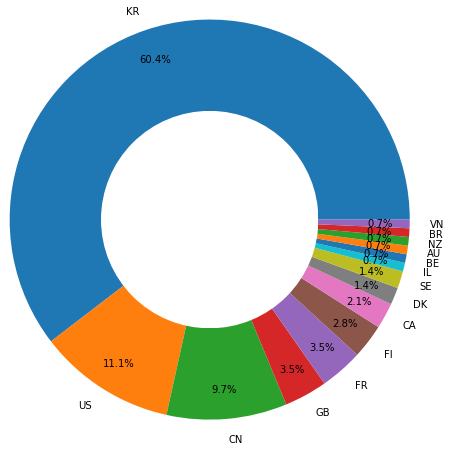

In [39]:
support_df = hero_pickrate.loc[(hero_pickrate["role"] == "Support")]
support_df

,hero,role,Games Used,Pick Rate
8,Lúcio,Support,319,100.000000
11,Ana,Support,307,96.238245
0,Zenyatta,Support,302,94.670846


In [37]:
offense_df = hero_pickrate.loc[(hero_pickrate["role"] == "Damage")]
offense_df 

In [38]:
tank_df = hero_pickrate.loc[(hero_pickrate["role"] == "Tank")]
tank_df 

In [55]:
labels = ['Support','Damage','Tank']

support_pick_rates = [
    int(support_df.iloc[0,3]),
    int(support_df.iloc[1,3]),
    int(support_df.iloc[2,3]),  
]

tank_pick_rates = [
    int(tank_df.iloc[0,3]),
    int(tank_df.iloc[1,3]),
    int(tank_df.iloc[2,3]),  
]

offense_pick_rates = [
    int(offense_df.iloc[0,3]),
    int(offense_df.iloc[1,3]),
    int(offense_df.iloc[2,3]),  
]

In [49]:
support_pick_rates

[100.0, 96.23824451410658, 94.67084639498434]

In [48]:
jj = (offense_df.iloc[0,3])
jj

95.29780564263322

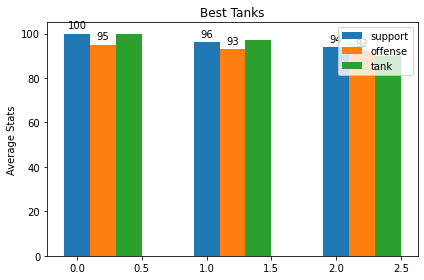

In [70]:
labels = ['Support','Damage','Tank']

#x = np.arange(len(labels))  # the label locations
width = 0.2# the width of the bars

fig, ax = plt.subplots()

x1 = np.arange(len(support_pick_rates))
x2 = [x + width for x in x1]
x3 = [x + width for x in x2]

rects1 = ax.bar(x1, support_pick_rates, width, label='support')
rects2 = ax.bar(x2, offense_pick_rates, width, label='offense')
rects3= ax.bar(x3, tank_pick_rates, width, label='tank')

# Add some text for labels, title and custom x-axis tick labels, etc.

ax.set_ylabel('Average Stats')
ax.set_title('Best Tanks')
#x.set_xticks(x)
#x.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

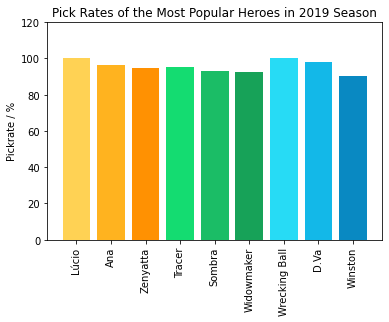

In [94]:
theta

array([1.22016894, 5.72678619, 4.90089473, 1.34000631, 0.34193296,
       0.54003046, 3.06499141, 3.77442704, 0.76935681])

AttributeError: 'list' object has no attribute 'get_label'

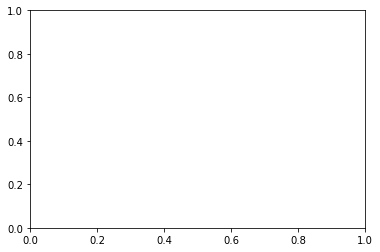

In [102]:
red_patch = mpatches.Patch(color='green', label='Tank')
blue_patch = mpatches.Patch(color='blue', label='Offense')
yellow_patch = mpatches.Patch(color='yellow', label='Support')
plt.legend(handles=([red_patch],[blue_patch],[yellow_patch]))
plt.show()